# 2.ダミーデータの作成


機械学習に関するプログラムの実験を行う上で、実データではないランダムなデータ（ダミーデータ）が欲しいということがあります。正規分布に従う乱数によるダミーデータの作成を通じてNumPyの使い方になれていきましょう。

## 【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

[1.0 0.8
0.8 1.0]
 

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。

numpy.random.multivariate_normal — NumPy v1.19 Manual

作成したndarrayのshapeは(500, 2)になります。

《シード値について》

実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

In [2]:
import numpy as np

np.random.seed(0)

mean = (-3, 0)
cov = ([1.0, 0.8], [0.8, 1.0])
matrix_ndarray = np.random.multivariate_normal(mean, cov, 500)
matrix_ndarray.shape

(500, 2)

## 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。

散布図はmatplotlibのplt.scatter()を使うことで描けます。

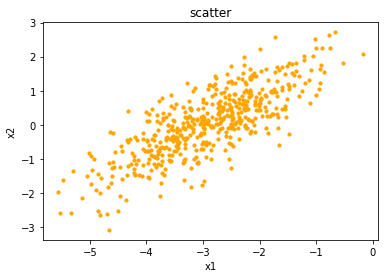

In [11]:
import matplotlib.pyplot  as plt

x,y = np.random.multivariate_normal(mean, cov, 500).T
np.random.seed(0)
plt.title("scatter")
plt.ylabel("x2")
plt.xlabel("x1")
plt.scatter(x,y,s=10, c="orange")
plt.show()

【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。

ヒストグラムはplt.hist()を使うことで描けます。

matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation

各次元ごとに作成し、2つのヒストグラムとしてください。

それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation


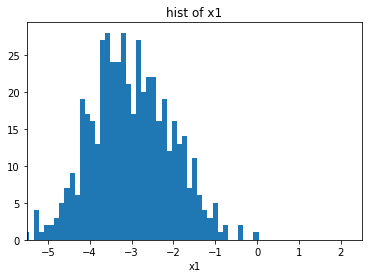

In [4]:
plt.title("hist of x1")
plt.xlabel("x1")
plt.xlim(left=-5.5, right=2.5)
plt.hist(x, 50)
plt.show()

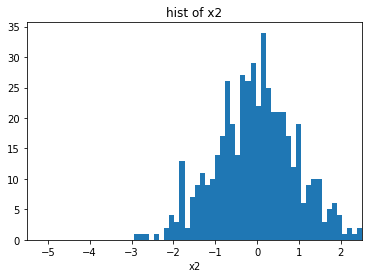

In [5]:
plt.title("hist of x2")
plt.xlabel("x2")
plt.xlim(left=-5.5, right=2.5)
plt.hist(y, 50)
plt.show()

## 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

[1.0 0.8
0.8 1.0]
 

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題4のものは1を表示してください。

《作成例》

課題のはじめに紹介した図と同じものです。


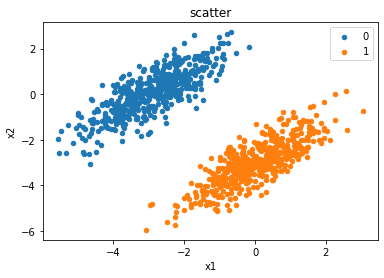

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

mean1 = (-3, 0) #1
mean2 = (0, -3) #4

cov = ([1.0, 0.8], [0.8, 1.0])

x1,y1 = np.random.multivariate_normal(mean1, cov, 500).T #1
x2,y2 = np.random.multivariate_normal(mean2, cov, 500).T #4

plt.title("scatter")
plt.ylabel("x2")
plt.xlabel("x1")
plt.scatter(x1,y1,s=20, label='0')
plt.scatter(x2,y2,s=20, label='1')
plt.legend()
plt.show()

## 【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。

numpy.concatenate — NumPy v1.19 Manual

numpy.vstack — NumPy v1.19 Manual

In [7]:
join_1 = np.random.multivariate_normal(mean1, cov, 500) #1
join_4 = np.random.multivariate_normal(mean2, cov, 500) #4
a = np.vstack((join_1,join_4))
b = np.concatenate((join_1,join_4))
print(a.shape,b.shape)
print(a)
print(b)

(1000, 2) (1000, 2)
[[-1.0043709   0.9128841 ]
 [-2.74070294 -0.34683218]
 [-2.7007556  -0.14591514]
 ...
 [-0.21533678 -3.53402472]
 [-1.67857013 -4.69790584]
 [-1.23912665 -4.75318784]]
[[-1.0043709   0.9128841 ]
 [-2.74070294 -0.34683218]
 [-2.7007556  -0.14591514]
 ...
 [-0.21533678 -3.53402472]
 [-1.67857013 -4.69790584]
 [-1.23912665 -4.75318784]]


## 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。

0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。

機械学習に使用するデータセットはこのような形になっていることが多いです。

《作成例》

データが3個+3個の場合は以下のような(6, 3)のndarrayになります。

In [8]:
one = np.ones((500,1),int)
zero = np.zeros((500,1),int)

label_ndarray = np.concatenate((zero,one), 0)
print(np.concatenate((a,label_ndarray), 1).shape)
print(np.concatenate((a,label_ndarray), 1))

(1000, 3)
[[-1.0043709   0.9128841   0.        ]
 [-2.74070294 -0.34683218  0.        ]
 [-2.7007556  -0.14591514  0.        ]
 ...
 [-0.21533678 -3.53402472  1.        ]
 [-1.67857013 -4.69790584  1.        ]
 [-1.23912665 -4.75318784  1.        ]]


In [9]:
Q1 = np.stack((x1, y1), 1) #Q1
Q4 = np.stack((x2, y2), 1) #Q4

label_Q1 = np.concatenate((Q1, zero), 1) #0 label
label_Q4 = np.concatenate((Q4, one), 1) #1 label

print(np.concatenate((label_Q1, label_Q4), 0)) # Q1 + Q4
print(np.concatenate((label_Q1, label_Q4), 0).shape)

[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.2185878  -3.15676476  1.        ]
 [-1.37970304 -4.27950068  1.        ]
 [ 1.49786804 -2.33126243  1.        ]]
(1000, 3)
